## API del Clima

Datos de Precipitacion historico NuevaYorkCity https://open-meteo.com/en/docs/air-quality-api

#### Importamos librerias necesarias para nuestro trabajo

In [1]:
import pandas as pd  # Importar la librería pandas para manipulación y análisis de datos
import matplotlib.pyplot as plt
import requests  # Importar el módulo requests para realizar solicitudes HTTP
import numpy as np

In [2]:
# Definimos la URL de la API con los parámetros deseados
url = 'https://archive-api.open-meteo.com/v1/archive?latitude=40.7143&longitude=-74.006&start_date=1980-01-01&end_date=2024-03-15&hourly=precipitation&timezone=America%2FNew_York'

# Realizamos una solicitud GET a la API y almacenamos la respuesta
response = requests.get(url)

# Extraemos el contenido de la respuesta en formato JSON
json_data = response.json()

# Creamos un DataFrame de Pandas con los datos JSON
df_url = pd.DataFrame(json_data)

# Extraemos la columna 'hourly'
nuevo_df = pd.DataFrame(df_url['hourly'])

# Transponemos el DataFrame para tener las fechas y precipitaciones en columnas separadas
transpose_df = nuevo_df.transpose()

# Convertimos la columna 'time' y 'precipitation' en listas
nuevo_time = transpose_df['time'].explode('time')
precipitacion = transpose_df['precipitation'].explode('precipitation')

# Creamos un diccionario con las dos listas
diccionario = {'time': nuevo_time, 'precipitation_ml': precipitacion}

# Creamos un nuevo DataFrame a partir del diccionario
df_precipitation = pd.DataFrame(diccionario)

# Separamos la fecha y la hora de la columna 'time' en columnas separadas
fecha = df_precipitation['time'].str.split('T', expand=True)[0]
hora = df_precipitation['time'].str.split('T', expand=True)[1]

# Concatenamos las nuevas columnas con el DataFrame existente
df_precip_split = pd.concat([fecha, hora, df_precipitation], axis=1)

# Renombramos las columnas y reordenamos el DataFrame
df_precip_split = df_precip_split.rename(columns={0: 'fecha', 1: 'hora'})
df_precip_split = df_precip_split[['fecha', 'hora', 'precipitation_ml']]

# Convertimos la columna 'fecha' a tipo datetime
df_precip_split['fecha'] = pd.to_datetime(df_precip_split['fecha'])

# Extraemos el año, mes y día de la columna 'fecha' y los agregamos como columnas separadas
df_precip_split['año'] = df_precip_split['fecha'].dt.strftime('%Y')
df_precip_split['mes'] = df_precip_split['fecha'].dt.strftime('%m')
df_precip_split['dia'] = df_precip_split['fecha'].dt.strftime('%d')

# Reordenamos las columnas
precipitacion_ml_1980_2024 = df_precip_split[['fecha', 'año', 'mes', 'dia', 'hora', 'precipitation_ml']]

# Mostramos el DataFrame final
precipitacion_ml_1980_2024


,fecha,año,mes,dia,hora,precipitation_ml
0,1980-01-01,1980,01,01,00:00,0.0
1,1980-01-01,1980,01,01,01:00,0.0
2,1980-01-01,1980,01,01,02:00,0.0
3,1980-01-01,1980,01,01,03:00,0.0
4,1980-01-01,1980,01,01,04:00,0.0
...,...,...,...,...,...,...
387499,2024-03-15,2024,03,15,19:00,0.0
387500,2024-03-15,2024,03,15,20:00,0.0
387501,2024-03-15,2024,03,15,21:00,0.0
387502,2024-03-15,2024,03,15,22:00,0.0


ETL - Graficando el promedio  anual de la precipitacion en NY

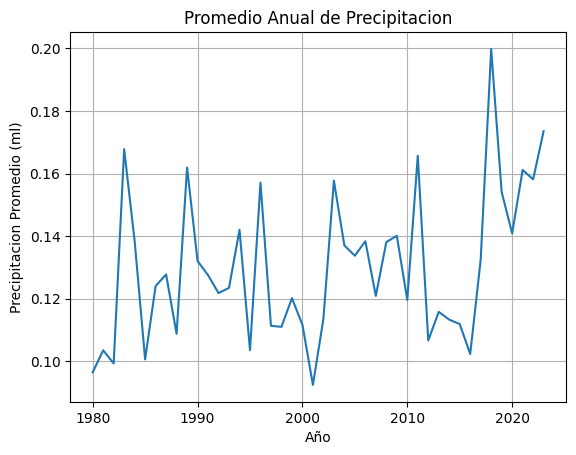

In [3]:
# Convert 'año' column to numeric, handling errors
precipitacion_ml_1980_2024['año'] = pd.to_numeric(precipitacion_ml_1980_2024['año'], errors='coerce')

df_new3 = precipitacion_ml_1980_2024.copy()
# Remove rows with NaN values in 'año' column
#df_new3 = precipitacion_ml_1980_2024.dropna(subset=['año'])

# Calculate the annual average temperature
annual_avg_prec = df_new3.groupby('año')['precipitation_ml'].mean()
annual_avg_prec = pd.DataFrame(annual_avg_prec)
annual_avg_prec.reset_index(inplace=True)
annual_avg_prec = annual_avg_prec[annual_avg_prec['año'] < 2024]
x = annual_avg_prec['año'].values
y = annual_avg_prec['precipitation_ml'].values



# Reset index to make 'año' a column again
#annual_avg_temp = annual_avg_temp.reset_index()

# Plot the data
plt.plot(x, y)
plt.xlabel('Año')
plt.ylabel('Precipitacion Promedio (ml)')
plt.title('Promedio Anual de Precipitacion')
plt.grid(True)
plt.show()

Guardando los datos promedio anual de precipitacion

In [4]:
annual_avg_prec.to_parquet("../0-DataSets/3-DatosScrapingConETL/precipitacion_ml_mean_1980_2023.parquet")

In [5]:
precipitacion_ml_2023_2024 = precipitacion_ml_1980_2024[precipitacion_ml_1980_2024['año'] >= 2023]
precipitacion_ml_2023_2024 

,fecha,año,mes,dia,hora,precipitation_ml
376944,2023-01-01,2023,01,01,00:00,1.0
376945,2023-01-01,2023,01,01,01:00,1.0
376946,2023-01-01,2023,01,01,02:00,0.1
376947,2023-01-01,2023,01,01,03:00,0.0
376948,2023-01-01,2023,01,01,04:00,0.0
...,...,...,...,...,...,...
387499,2024-03-15,2024,03,15,19:00,0.0
387500,2024-03-15,2024,03,15,20:00,0.0
387501,2024-03-15,2024,03,15,21:00,0.0
387502,2024-03-15,2024,03,15,22:00,0.0


In [6]:
#exportar a parquet
precipitacion_ml_2023_2024.to_parquet("../0-DataSets/3-DatosScrapingConETL/precipitacion_ml_2023_2024.parquet")